/home/k-iida/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


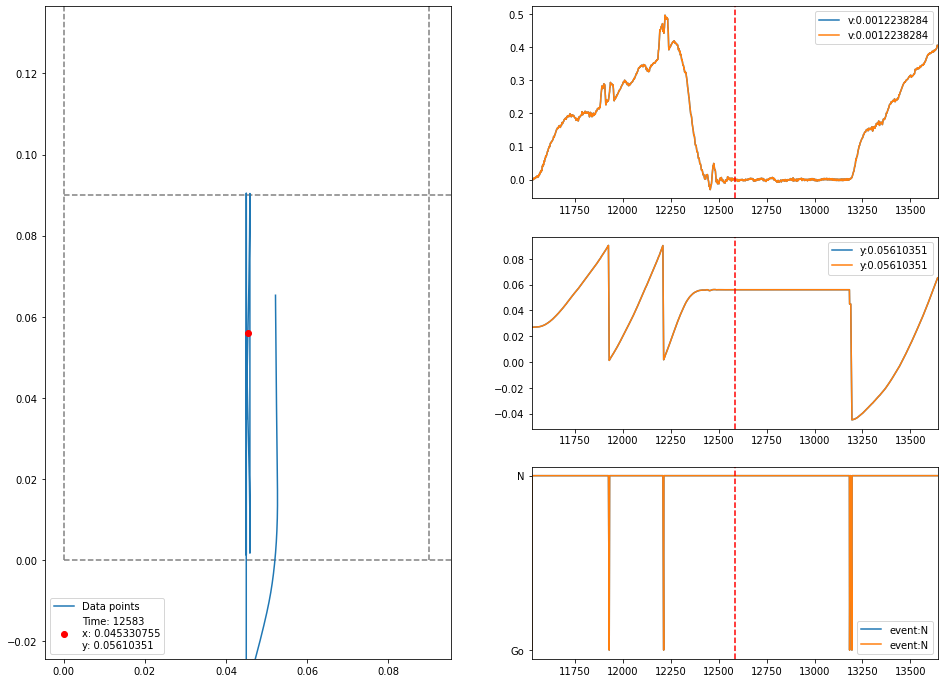

interactive(children=(Dropdown(description='Label1:', index=5, options=('x', 'y', 'theta', 'omega', 'v_batt', …

<function __main__.show_plot(label1, label2, label3, label4, label5, label6, time_s, range_s, scale_s)>

In [1]:
import numpy as np
import pandas as pd
from ipywidgets import interact, Dropdown, IntSlider, FloatSlider
import matplotlib.pyplot as plt
%matplotlib inline

# Load log.csv with pandas
df = pd.read_csv('../downloads/log.csv')
labels = df.columns[1:]

# Get the middle time
time_min = df['time'].min()
time_max = df['time'].max()
time_middle = (time_min + time_max) / 2

default = ["v", "v", "y", "y", "event", "event"]

def show_plot(label1, label2, label3, label4, label5, label6, time_s, range_s, scale_s):
    fig = plt.figure(figsize=(16, 12))
    ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((3, 2), (0, 1))
    ax3 = plt.subplot2grid((3, 2), (1, 1))
    ax4 = plt.subplot2grid((3, 2), (2, 1))
    
    # Plot grid
    for i in range(0, 33):
        ax1.plot((i * 0.09, i * 0.09), (0, 32 * 0.09), color='gray', linestyle='--')
        ax1.plot((0, 32 * 0.09), (i * 0.09, i * 0.09), color='gray', linestyle='--')
    ax1.plot(df['x'], df['y'], label="Data points")
    selected_time = df[df['time'] == time_s]
    ax1.axis('equal')
    if not selected_time.empty:
        selected_x = selected_time['x'].values[0]
        selected_y = selected_time['y'].values[0]
        ax1.plot(selected_x, selected_y, 'ro', label=f'Time: {time_s}\nx: {selected_x}\ny: {selected_y}')
        ax1.set(xlim=(selected_x - 0.05/scale_s, selected_x + 0.05/scale_s), ylim=(selected_y - 0.05/scale_s, selected_y + 0.05/scale_s))
    
    ax1.legend()
    
    # Time series plot 1
    value1 = selected_time[label1].values[0] if not selected_time.empty else None
    value2 = selected_time[label2].values[0] if not selected_time.empty else None
    ax2.plot(df['time'], df[label1], label=f'{label1}:{value1}')
    ax2.plot(df['time'], df[label2], label=f'{label2}:{value2}')
    ax2.axvline(x=time_s, color='red', linestyle='--')
    ax2.set_xlim(time_s - range_s / 2, time_s + range_s / 2)
    ax2.legend()

    # Set y-axis limits based on the visible range
    visible_range_1 = df[(df['time'] >= time_s - range_s / 2) & (df['time'] <= time_s + range_s / 2)]
    if not visible_range_1.empty:
        minv = visible_range_1[[label1, label2]].min().min()
        maxv = visible_range_1[[label1, label2]].max().max()
        diff = maxv - minv
        if diff == 0:
            diff = 1
        ax2.set_ylim(minv - abs(diff*0.05), maxv + abs(diff*0.05 ))
    
    # Time series plot 2
    value3 = selected_time[label3].values[0] if not selected_time.empty else None
    value4 = selected_time[label4].values[0] if not selected_time.empty else None
    ax3.plot(df['time'], df[label3], label=f'{label3}:{value3}')
    ax3.plot(df['time'], df[label4], label=f'{label4}:{value4}')
    ax3.axvline(x=time_s, color='red', linestyle='--')
    ax3.set_xlim(time_s - range_s / 2, time_s + range_s / 2)
    ax3.legend()

    # Set y-axis limits based on the visible range
    visible_range_2 = df[(df['time'] >= time_s - range_s / 2) & (df['time'] <= time_s + range_s / 2)]
    if not visible_range_2.empty:
        minv = visible_range_2[[label3, label4]].min().min()
        maxv = visible_range_2[[label3, label4]].max().max()
        diff = maxv - minv
        if diff == 0:
            diff = 1
        ax3.set_ylim(minv - abs(diff*0.05), maxv + abs(diff*0.05 ))
    
    # Time series plot 3
    value5 = selected_time[label5].values[0] if not selected_time.empty else None
    value6 = selected_time[label6].values[0] if not selected_time.empty else None
    ax4.plot(df['time'], df[label5], label=f'{label5}:{value5}')
    ax4.plot(df['time'], df[label6], label=f'{label6}:{value6}')
    ax4.axvline(x=time_s, color='red', linestyle='--')
    ax4.set_xlim(time_s - range_s / 2, time_s + range_s / 2)
    ax4.legend()

    # Set y-axis limits based on the visible range
    visible_range_3 = df[(df['time'] >= time_s - range_s / 2) & (df['time'] <= time_s + range_s / 2)]
    if not visible_range_3.empty:
        minv = visible_range_3[[label5, label6]].min().min()
        maxv = visible_range_3[[label5, label6]].max().max()
        diff = maxv - minv
        if diff == 0:
            diff = 1
        ax4.set_ylim(minv - abs(diff*0.05), maxv + abs(diff*0.05 ))
    
    plt.show()

label_dd1 = Dropdown(description='Label1:', options=list(labels), value=default[0])
label_dd2 = Dropdown(description='Label2:', options=list(labels), value=default[1])
label_dd3 = Dropdown(description='Label3:', options=list(labels), value=default[2])
label_dd4 = Dropdown(description='Label4:', options=list(labels), value=default[3])
label_dd5 = Dropdown(description='Label5:', options=list(labels), value=default[4])
label_dd6 = Dropdown(description='Label6:', options=list(labels), value=default[5])
time_slider = IntSlider(value=int(time_middle), min=int(time_min), max=int(time_max), description="time")
range_slider = FloatSlider(value=float(time_max - time_min), min=1.0, max=float(time_max - time_min), step=0.1, description='Range')
scale_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Scale')

interact(show_plot, label1=label_dd1, label2=label_dd2, label3=label_dd3, label4=label_dd4, label5=label_dd5, label6=label_dd6, time_s=time_slider, range_s=range_slider, scale_s=scale_slider)
